In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
sns.set_theme(style="ticks", palette="muted")
sns.set_context("notebook", font_scale=1.5)

plt.rcParams.update({
#    "pgf.texsystem": "pdflatex",
    "font.family": "sans serif",
#    "text.usetex": True,
    "pgf.rcfonts": False,
})

def find_csv_files(base_directory, prefix, ignore=None):
    csv_files = []
    for root, dirs, files in os.walk(base_directory):
        for file in files:
            if file.startswith(prefix) and file.endswith('.csv'):
                if ignore is not None and ignore in file:
                    continue
                csv_files.append(os.path.join(root, file))
    return csv_files

def load_csv_files(csv_files):
    dataframes = []
    for file in csv_files:
        df = pd.read_csv(file)
        dataframes.append(df)
    return dataframes

def concatenate_dataframes(dataframes):
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df


base_directory = 'results'
prefix = 'st_benchmark'
csv_files = find_csv_files(base_directory, prefix)
dataframes = load_csv_files(csv_files)
df = concatenate_dataframes(dataframes)
df['max_time'] = pd.to_numeric(df['max_time'], errors='coerce')
df['max_time'] = df['max_time'].fillna(0)
df['max_time'] = df['max_time'].astype('Int64')

df['method_type'] = df.apply(lambda row: f"{row['method']} (max. {row['max_time']}s)" 
                                  if pd.notna(row['max_time']) and row['max_time'] != 0 
                                  else row['method'], axis=1)

df

,seed,n_terminals,graph_nodes,graph_edges,is_scale_free,scale_free_params,total_weight,max_time,tolerance,strict_acyclic,integrality_focus,method,nodes_steiner,edges_steiner,cost_of_steiner_tree,cost_diff,time,time_diff,method_type
0,0,10,1000,2991,False,"5,0.1",1489.334147,0,0.00100,NaN,NaN,nx,38,37,6.336373,0.601080,0.030361,-745.059340,nx
1,0,10,1000,2991,False,"5,0.1",1489.334147,7200,0.00100,1.0,1.0,corneto,38,37,5.735294,-0.601080,745.089700,745.059340,corneto (max. 7200s)
2,0,30,500,1000,True,"5,0.1",516.906338,0,0.00001,NaN,NaN,nx,90,89,36.800003,6.447920,0.028346,-716.463409,nx
3,0,30,500,1000,True,"5,0.1",516.906338,7200,0.00001,1.0,1.0,corneto,99,98,30.352084,-6.447920,716.491755,716.463409,corneto (max. 7200s)
4,0,30,1250,2496,False,"5,0.1",1242.463823,0,0.00001,NaN,NaN,nx,66,65,20.312937,1.456576,0.037676,-399.468077,nx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0,50,1500,3000,True,"5,0.1",1492.875319,7200,0.00100,1.0,1.0,corneto,221,220,58.736900,-19.577491,853.798569,853.757577,corneto (max. 7200s)
1782,0,10,1000,2000,True,"5,0.1",997.828291,0,0.00100,NaN,NaN,nx,62,61,19.412427,1.663111,0.035800,-7201.086583,nx
1783,0,10,1000,2000,True,"5,0.1",997.828291,7200,0.00100,0.0,1.0,corneto,68,68,17.749315,-1.663111,7201.122383,7201.086583,corneto (max. 7200s)
1784,0,10,250,496,False,"5,0.1",262.557405,0,0.00100,NaN,NaN,nx,21,20,4.384744,0.245795,0.006182,-4.749666,nx


In [3]:
df_cn = df[df.method=="corneto"].copy()
df_cn["cost_of_nx"] = df_cn["cost_of_steiner_tree"] + df_cn["cost_diff"].abs()
df_cn["improvement"] = ((df_cn["cost_of_nx"] - df_cn["cost_of_steiner_tree"])/df_cn["cost_of_nx"])*100
df_cn

,seed,n_terminals,graph_nodes,graph_edges,is_scale_free,scale_free_params,total_weight,max_time,tolerance,strict_acyclic,...,method,nodes_steiner,edges_steiner,cost_of_steiner_tree,cost_diff,time,time_diff,method_type,cost_of_nx,improvement
1,0,10,1000,2991,False,"5,0.1",1489.334147,7200,0.00100,1.0,...,corneto,38,37,5.735294,-0.601080,745.089700,745.059340,corneto (max. 7200s),6.336373,9.486177
3,0,30,500,1000,True,"5,0.1",516.906338,7200,0.00001,1.0,...,corneto,99,98,30.352084,-6.447920,716.491755,716.463409,corneto (max. 7200s),36.800003,17.521519
5,0,30,1250,2496,False,"5,0.1",1242.463823,7200,0.00001,1.0,...,corneto,75,74,18.856361,-1.456576,399.505754,399.468077,corneto (max. 7200s),20.312937,7.170681
7,0,10,1000,1996,False,"5,0.1",995.893973,600,0.00010,1.0,...,corneto,27,26,5.771338,-0.418923,24.874994,24.853154,corneto (max. 600s),6.190261,6.767454
9,0,30,1250,3741,False,"5,0.1",1855.781695,7200,0.00100,1.0,...,corneto,71,70,12.927664,-2.892007,1041.268767,1041.219082,corneto (max. 7200s),15.819671,18.281082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,0,30,1000,1996,False,"5,0.1",995.893973,7200,0.00001,0.0,...,corneto,76,75,16.533224,-2.247591,7201.303460,7201.271561,corneto (max. 7200s),18.780815,11.967485
1779,0,50,500,996,False,"5,0.1",515.900094,600,0.00100,1.0,...,corneto,99,98,22.420924,-5.399933,309.922972,309.883051,corneto (max. 600s),27.820857,19.409658
1781,0,50,1500,3000,True,"5,0.1",1492.875319,7200,0.00100,1.0,...,corneto,221,220,58.736900,-19.577491,853.798569,853.757577,corneto (max. 7200s),78.314391,24.998587
1783,0,10,1000,2000,True,"5,0.1",997.828291,7200,0.00100,0.0,...,corneto,68,68,17.749315,-1.663111,7201.122383,7201.086583,corneto (max. 7200s),19.412427,8.567251


In [4]:
(
    df_cn
    .groupby('graph_nodes')['time']
    .count()
    .reset_index(name='n')
)

,graph_nodes,n
0,250,149
1,500,148
2,750,150
3,1000,150
4,1250,147
5,1500,149


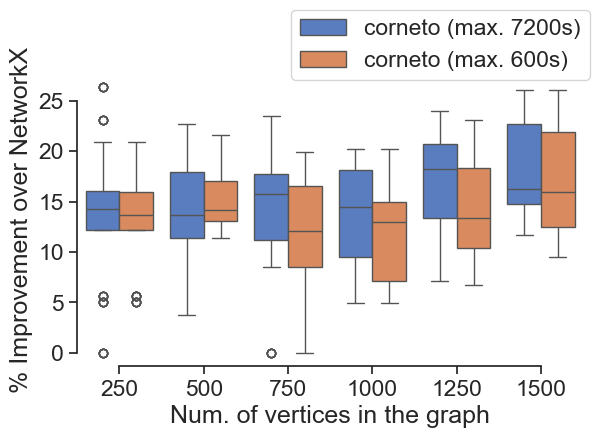

In [5]:
sns.boxplot(data=df_cn, x="graph_nodes", y="improvement", hue="method_type", fill=True, log_scale=False)
sns.despine(trim=True, left=False)
plt.legend(loc='center left', bbox_to_anchor=(0.40, 1.10))
plt.xlabel("Num. of vertices in the graph")
plt.ylabel("% Improvement over NetworkX")
plt.tight_layout()
plt.savefig("steiner_cn_nx_improv_vertices.pdf", format="pdf")

In [6]:
df_cn[(df_cn.max_time==600) & (df_cn.strict_acyclic == 1.0)].improvement.mean()

13.467206424510444

In [7]:
df_cn[(df_cn.max_time==7200) & (df_cn.strict_acyclic == 1.0)].improvement.mean()

15.357961627261664

In [8]:
(
    df
    .groupby(['graph_nodes', 'method_type'])['time']
    .count()
    .reset_index(name='n')
)

,graph_nodes,method_type,n
0,250,corneto (max. 600s),61
1,250,corneto (max. 7200s),88
2,250,nx,149
3,500,corneto (max. 600s),60
4,500,corneto (max. 7200s),88
5,500,nx,148
6,750,corneto (max. 600s),60
7,750,corneto (max. 7200s),90
8,750,nx,150
9,1000,corneto (max. 600s),60


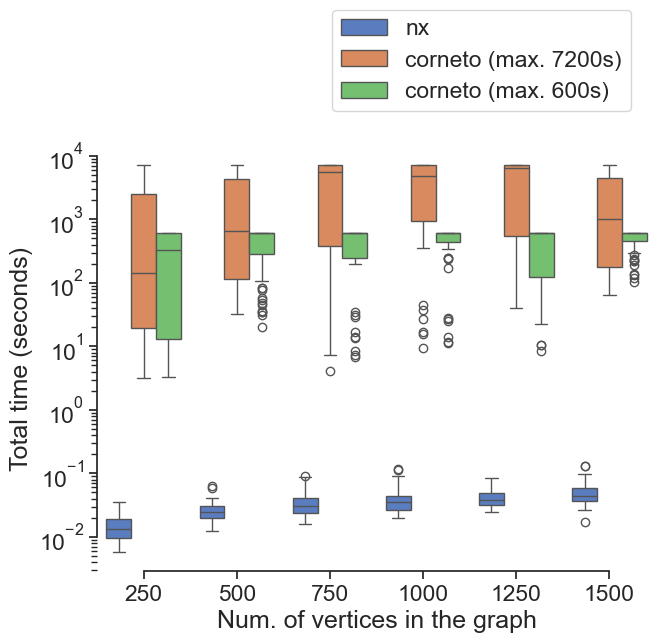

In [9]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(data=df, x="graph_nodes", y="time", hue="method_type", log_scale=True, ax=ax)
sns.despine(trim=True, left=False)
plt.legend(loc='center left', bbox_to_anchor=(0.40, 1.2))
plt.xlabel("Num. of vertices in the graph")
plt.ylabel(f"Total time (seconds)")
plt.tight_layout()
plt.savefig("time.pdf", format="pdf")

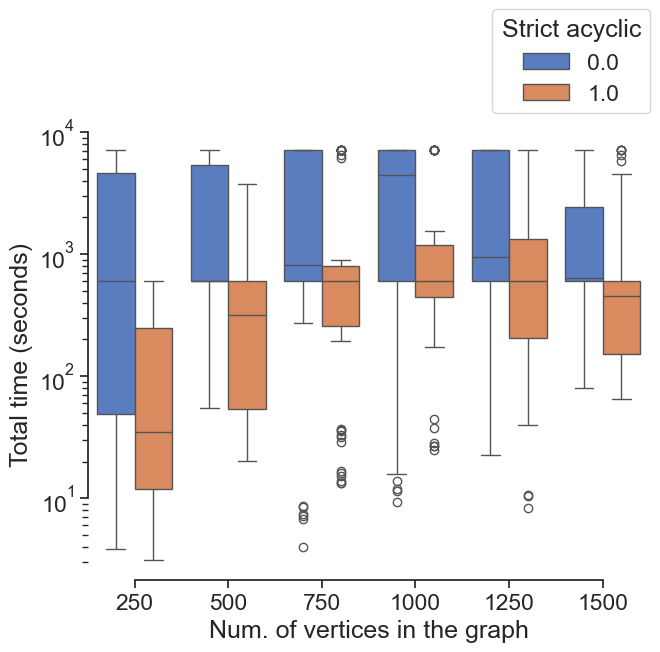

In [10]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(data=df_cn, x="graph_nodes", y="time", hue="strict_acyclic", log_scale=True, ax=ax)
sns.despine(trim=True, left=False)
plt.legend(loc='center left', bbox_to_anchor=(0.70, 1.15), title="Strict acyclic")
plt.xlabel("Num. of vertices in the graph")
plt.ylabel(f"Total time (seconds)")
plt.tight_layout()
plt.savefig("strict_acyclic.pdf", format="pdf")

In [11]:
(
    df_cn
    .groupby(['graph_nodes', 'strict_acyclic'])['time']
    .count()
    .reset_index(name='n')
)

,graph_nodes,strict_acyclic,n
0,250,0.0,74
1,250,1.0,75
2,500,0.0,73
3,500,1.0,75
4,750,0.0,75
5,750,1.0,75
6,1000,0.0,75
7,1000,1.0,75
8,1250,0.0,72
9,1250,1.0,75


In [12]:
csv_files = find_csv_files(base_directory, prefix, ignore="mt7200")
dataframes = load_csv_files(csv_files)
df = concatenate_dataframes(dataframes)
df = df[(df.strict_acyclic.isna()) | (df.strict_acyclic > 0)]
df

,seed,n_terminals,graph_nodes,graph_edges,is_scale_free,scale_free_params,total_weight,max_time,tolerance,strict_acyclic,integrality_focus,method,nodes_steiner,edges_steiner,cost_of_steiner_tree,cost_diff,time,time_diff
0,0,10,1000,1996,False,"5,0.1",995.893973,NaN,0.00010,NaN,NaN,nx,26,25,6.190261,0.418923,0.021841,-24.853154
1,0,10,1000,1996,False,"5,0.1",995.893973,600.0,0.00010,1.0,1.0,corneto,27,26,5.771338,-0.418923,24.874994,24.853154
2,0,50,1000,1996,False,"5,0.1",995.893973,NaN,0.00010,NaN,NaN,nx,103,102,29.487310,3.914833,0.037522,-600.587218
4,0,40,250,496,False,"5,0.1",262.557405,NaN,0.00010,NaN,NaN,nx,66,65,26.208063,4.201310,0.017194,-14.521033
5,0,40,250,496,False,"5,0.1",262.557405,600.0,0.00010,1.0,1.0,corneto,70,69,22.006752,-4.201310,14.538228,14.521033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,10,1500,3000,True,"5,0.1",1492.875319,600.0,0.00001,1.0,1.0,corneto,58,57,18.827972,-1.970681,601.973498,601.939116
716,0,10,1250,2496,False,"5,0.1",1242.463823,NaN,0.00010,NaN,NaN,nx,30,29,10.569072,2.182266,0.038241,-25.114471
718,0,50,500,996,False,"5,0.1",515.900094,NaN,0.00100,NaN,NaN,nx,90,89,27.820857,5.399933,0.039920,-309.883051
719,0,50,500,996,False,"5,0.1",515.900094,600.0,0.00100,1.0,1.0,corneto,99,98,22.420924,-5.399933,309.922972,309.883051


In [13]:
max_time = df.max_time.dropna().unique()[0].astype(int)
max_time # seconds

600

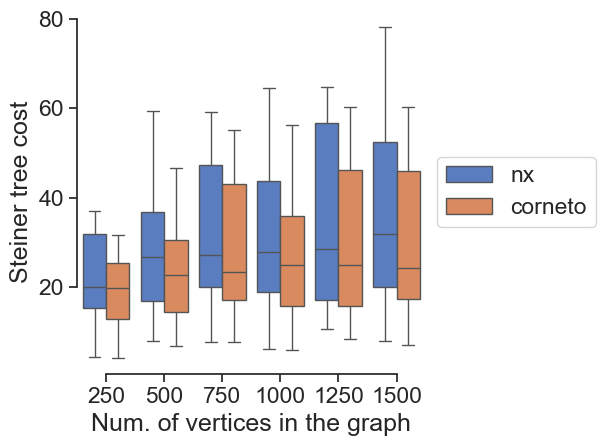

In [14]:
sns.boxplot(data=df, x="graph_nodes", y="cost_of_steiner_tree", hue="method", fill=True, log_scale=False)
sns.despine(trim=True, left=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Num. of vertices in the graph")
plt.ylabel("Steiner tree cost")
plt.tight_layout()
plt.savefig("steiner_cn_nx_vertices_600s.pdf", format="pdf")

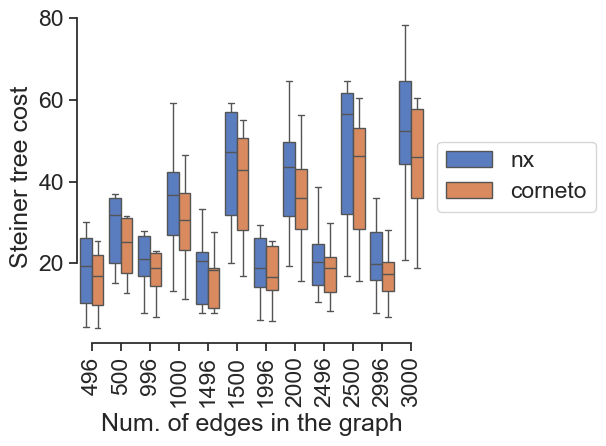

In [15]:
sns.boxplot(data=df, x="graph_edges", y="cost_of_steiner_tree", hue="method", fill=True, log_scale=False)
sns.despine(trim=True, left=False)
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Num. of edges in the graph")
plt.ylabel("Steiner tree cost")
plt.tight_layout()
plt.savefig("steiner_cn_nx_edges_600s.pdf", format="pdf")

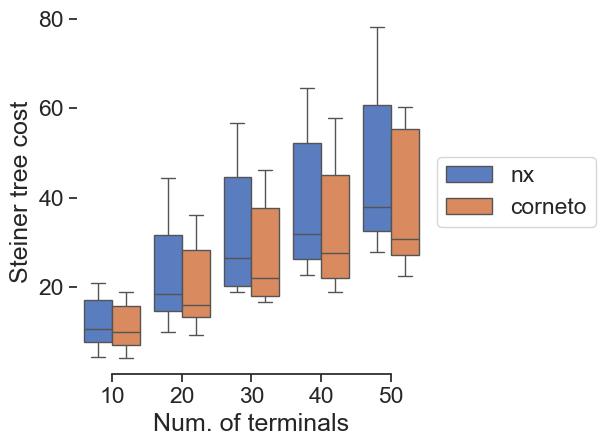

In [16]:
sns.boxplot(data=df, x="n_terminals", y="cost_of_steiner_tree", hue="method", log_scale=False)
sns.despine(trim=True, left=True)
#plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Num. of terminals")
plt.ylabel("Steiner tree cost")
plt.tight_layout()
plt.savefig("steiner_cn_nx_terminals_600s.pdf", format="pdf")

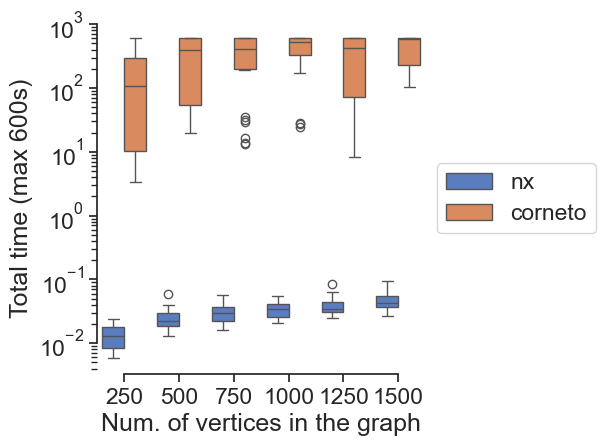

In [17]:
sns.boxplot(data=df, x="graph_nodes", y="time", hue="method", log_scale=True)
sns.despine(trim=True, left=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Num. of vertices in the graph")
plt.ylabel(f"Total time (max {max_time}s)")
plt.tight_layout()
plt.savefig("steiner_cn_nx_time_600s.pdf", format="pdf")

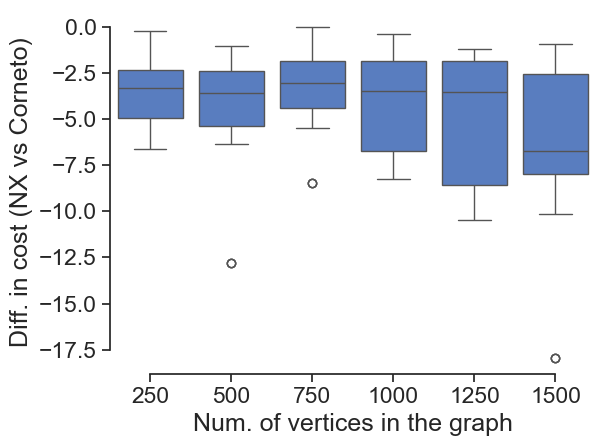

In [18]:
sns.boxplot(data=df[(df.method=="corneto")], x="graph_nodes", y="cost_diff", legend=False)
sns.despine(trim=True, left=False)
plt.xlabel("Num. of vertices in the graph")
plt.ylabel("Diff. in cost (NX vs Corneto)")
plt.tight_layout()
plt.savefig("steiner_cn_nx_cost_diff_600s.pdf", format="pdf")

Mean improvement of corneto vs nx: 13.47 %


<>:10: SyntaxWarning: invalid escape sequence '\%'
<>:10: SyntaxWarning: invalid escape sequence '\%'
/var/folders/b4/gwkwsdb93sv11rtztqbm3l040000gn/T/ipykernel_48332/803260313.py:10: SyntaxWarning: invalid escape sequence '\%'
  plt.ylabel("\% Improvement")


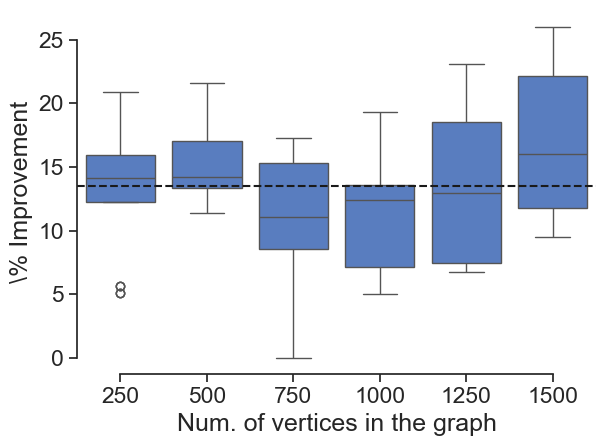

In [19]:
# Average improvement
df_cn = df[df.method=="corneto"].copy()
df_cn["cost_of_nx"] = df_cn["cost_of_steiner_tree"] + df_cn["cost_diff"].abs()
df_cn["improvement"] = ((df_cn["cost_of_nx"] - df_cn["cost_of_steiner_tree"])/df_cn["cost_of_nx"])*100
print(f"Mean improvement of corneto vs nx: {(df_cn['improvement'].mean()):.2f} %")

sns.boxplot(data=df_cn, x="graph_nodes", y="improvement", legend=False)
sns.despine(trim=True, left=False)
plt.xlabel("Num. of vertices in the graph")
plt.ylabel("\% Improvement")
plt.axhline(y=df_cn['improvement'].mean(), linestyle="--", color="k")
plt.tight_layout()
plt.savefig("steiner_cost_improv_600s.pdf", format="pdf")

Text(0.5, 0, 'Difference in cost (NX vs CORNETO)')

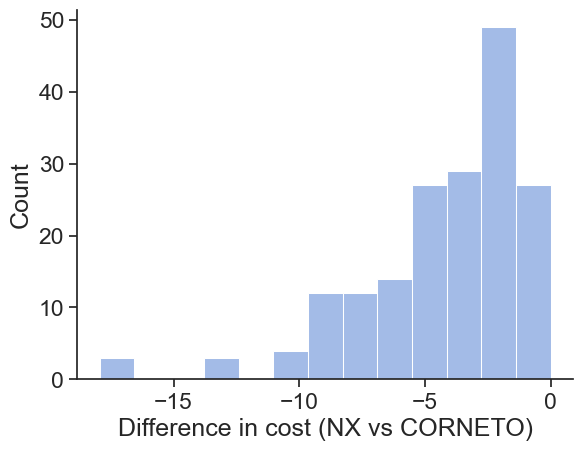

In [20]:
sns.histplot(df[df.method=="corneto"][["cost_diff"]], linewidth=.75, legend=False)
sns.despine(trim=False, left=False)
plt.xlabel("Difference in cost (NX vs CORNETO)")